In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot ; jtplot.style()

Text(0, 0.5, 'reward presence')

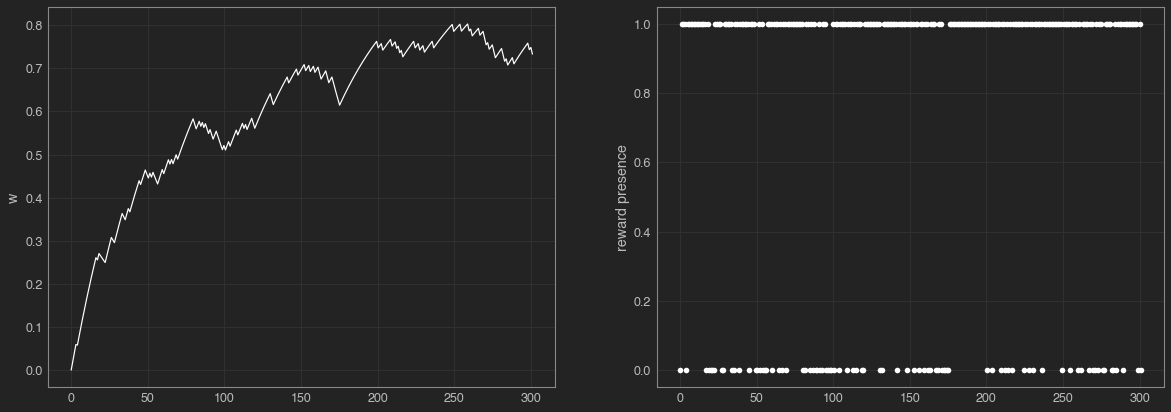

In [8]:
n = 300 # trial count
p = [0.3, .7] # probability of the reward on a given trial following stimulus
q = [0 , 1] # probability of the stimulus being shown on a given trial
epsilon = 0.02 # learning rate
u = np.random.choice(2, n, p = q) # whether or not the stimulus was flashed in this trial
r = np.zeros(n) 
w = np.zeros(n) 

stim_shown = np.argwhere(u == 1)[:, 0]
r[stim_shown] = np.random.choice(2, size = len(stim_shown), p = p) # only reward with stim presence

for i in range(len(w)) :
    if i == 0 : 
        continue
    w[i] = w[i - 1] + epsilon * (r[i] - w[i - 1] * u[i]) * u[i]

v = u*w
delta = r - v

_, ax = plt.subplots(1, 2, figsize = (20, 7)) 
seq = np.linspace(0, n+1, n) 
ax[0].plot(seq, w, color = 'b') 
ax[0].set_ylabel('w')
ax[1].plot(seq, r, 'o', color = 'b')
ax[1].set_ylabel('reward presence')

## extinction :

Text(0, 0.5, 'reward presence')

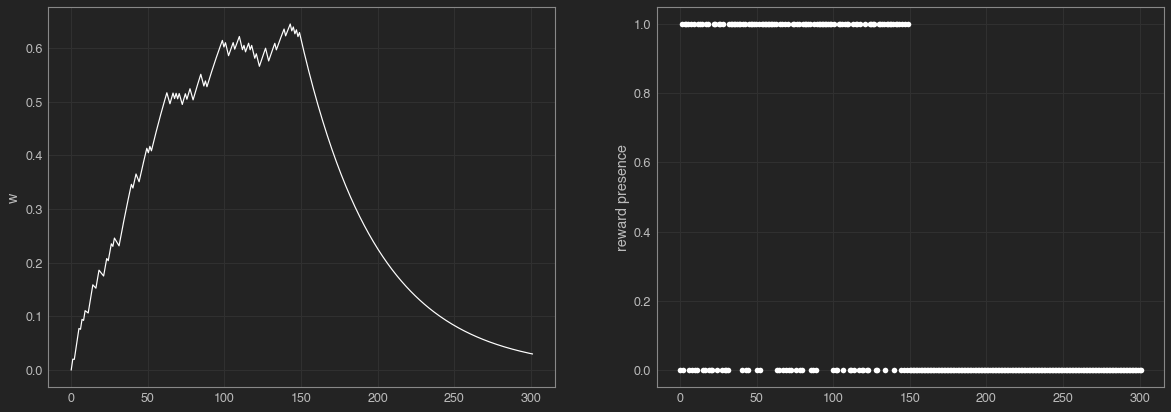

In [9]:
n = 300 
p = [0.3, .7] 
q = [0 , 1] 
epsilon = 0.02 
u = np.random.choice(2, n, p = q) 
r = np.zeros(n) 
w = np.zeros(n) 
v = np.zeros(n) 
delta = np.zeros(n) 

stim_shown = np.argwhere(u == 1)[:, 0]
r[stim_shown] = np.random.choice(2, size = len(stim_shown), p = p) 
r[n//2 ::] = 0 # stop rewarding halfway through task

for i in range(len(w)) :
    if i == 0 : 
        continue
    v[i] = w[i-1] * u[i]
    delta[i] = r[i] - v[i]
    w[i] = w[i-1] + epsilon * delta[i] * u[i]
    
v = u*w
delta = r - v

_, ax = plt.subplots(1, 2, figsize = (20, 7)) 
seq = np.linspace(0, n+1, n) 
ax[0].plot(seq, w, color = 'b') 
ax[0].set_ylabel('w')
ax[1].plot(seq, r, 'o', color = 'b')
ax[1].set_ylabel('reward presence')

## blocking paradigm : 

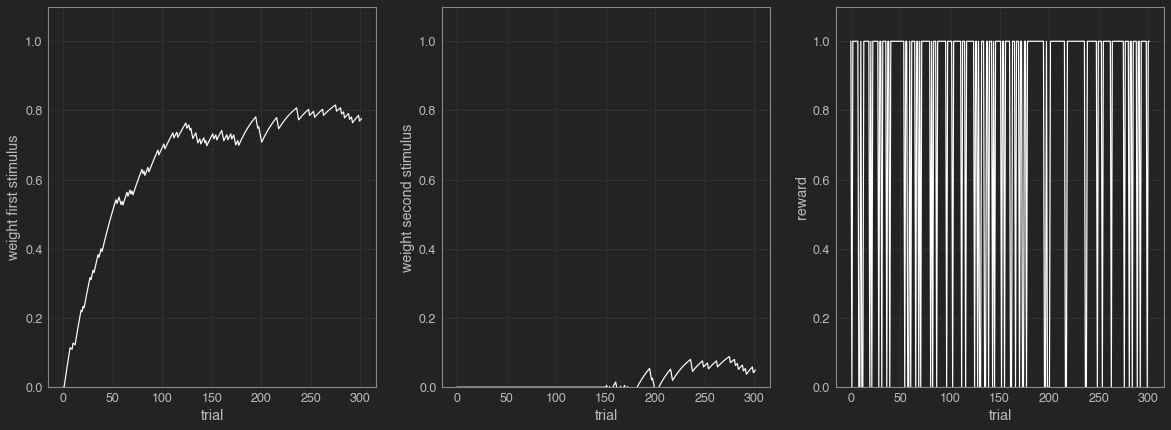

In [4]:
n = 300
p = [0.2, 0.8] 
q = [0.0 , 1] 
epsilon = 0.02 
u = np.random.choice(2, size = (2, n), p = q) 
u[1, 0:n//2] = 0 # set second stimulus values = 0 on the first 50% of the trials.
r = np.random.choice(2, n, p = p) 
w = np.zeros((2, n)) 
v = np.zeros(n) 
delta = np.zeros(n) 

stim_shown = np.argwhere(np.isin(u, 1)[0, :] | np.isin(u, 1)[1, :])[:, 0] 
r[stim_shown] = np.random.choice(2, size = len(stim_shown), p = p)

for i in range(n) :
    if i == 0 : 
        continue
    v[i] = np.dot(w[:, i-1], u[:, i]) # calculate expec. using the dot product for each weight
    delta[i] = r[i] - v[i]
    w[:, i] = w[:, i-1] + epsilon*delta[i] * u[:, i]

_, ax = plt.subplots(1, 3, figsize = (20, 7)) 
seq = np.linspace(0, n+1, n) 
values = [w[0], w[1], r]
names = ['weight first stimulus', 'weight second stimulus', 'reward']
for i, val, name in zip(range(3), values, names) : 
    ax[i].plot(seq, val, color = 'b')
    ax[i].set_ylabel(name)
    ax[i].set_xlabel('trial')
    ax[i].set_ylim(0, 1.1)

### same operation without turning w into a vector

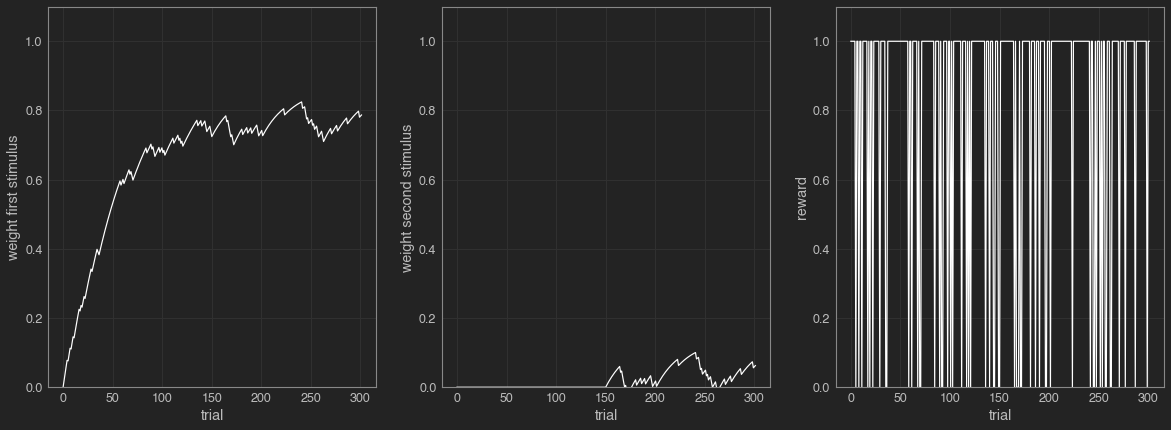

In [5]:
n = 300 # trial count
p = [0.2, 0.8] # prob reward on a given trial following the stimulus
q = [0.0 , 1] # probability of the stimulus being shown on a given trial
epsilon = 0.02 # learning rate
u = np.random.choice(2, size = (2, n), p = q) 
u[1, 0:n//2] = 0 # set second stimulus values = 0 on the first 50% of the trials.
r = np.random.choice(2, n, p = p) 
w = np.zeros((2, n)) 
v = np.zeros(n) 
delta = np.zeros(n) 

stim_shown = np.argwhere(np.isin(u, 1)[0, :] | np.isin(u, 1)[1, :])[:, 0]
r[stim_shown] = np.random.choice(2, size = len(stim_shown), p = p) 
w = np.zeros(2)
w_over_time = np.zeros((2, n))
for i in range(n) :
    if i == 0 : 
        continue
    v[i] = np.dot(w, u[:, i]) # calculate exp. using the dot product for each weight

    delta[i] = r[i] - v[i]
    w = w + epsilon*delta[i] * u[:, i]

    w_over_time[:, i] = w

_, ax = plt.subplots(1, 3, figsize = (20, 7)) 
seq = np.linspace(0, n+1, n) 
values = [w_over_time[0], w_over_time[1], r]
names = ['weight first stimulus', 'weight second stimulus', 'reward']
for i, val, name in zip(range(3), values, names) : 
    ax[i].plot(seq, val, color = 'b')
    ax[i].set_ylabel(name)
    ax[i].set_xlabel('trial')
    ax[i].set_ylim(0, 1.1)

##### since the first stimulus is already asymptotically approaching P(r),the surprise  'v' on a given reward trial will already be tiny by the time the subject starts seeing the second stimulus

## Secondary conditioning : 

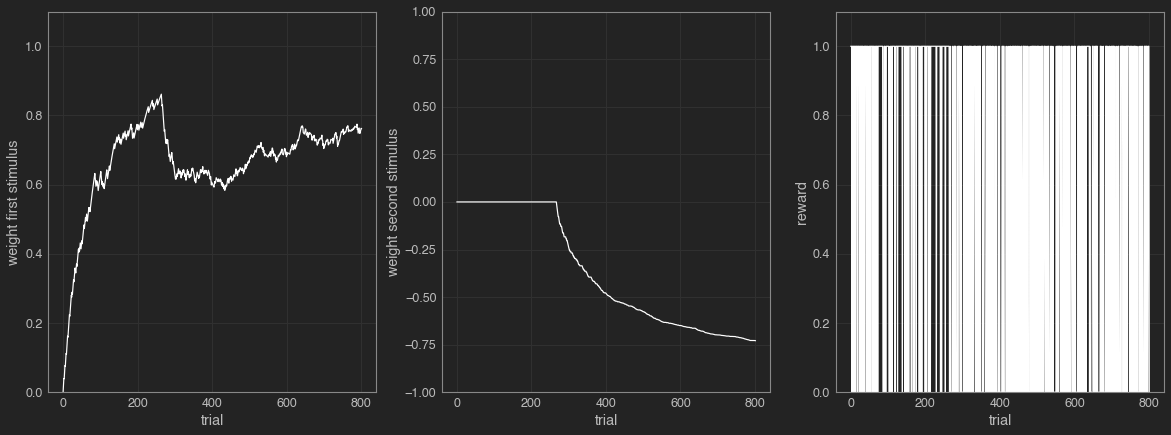

In [6]:
n = 800 # trial count
p = [0.2, .8] # prob reward on a given trial following the stimulus
q = [0.0 , 1] # probability of the stimulus being shown on a given trial
q2 = [0.5, .5] # probability of the second stimulus being shown
epsilon = 0.02 # learning rate

u = np.zeros((2, n))
u[0] = np.random.choice(2, size = n, p = q) 
u[1] = np.random.choice(2, size = n, p = q2)
u[1, 0:n//3] = 0
r = np.zeros(n)
w = np.zeros((2, n)) 
v = np.zeros(n) 
delta = np.zeros(n) 

stim_1_shown = np.argwhere((u[0] == 1))[:, 0] # get index where stim 2 is shown
r[stim_1_shown] = np.random.choice(2, size = len(stim_1_shown), p = p)
stim_2_shown = np.argwhere(u[1] == 1)[:, 0] # get index where stim 2 is shown
r[stim_2_shown] = 0 # remove reward

for i in range(n) :
    if i == 0 : 
        continue
    v[i] = np.dot(w[:, i-1], u[:, i]) # calculate exp. using the dot product for each weight
    delta[i] = r[i] - v[i]
    w[:, i] = w[:, i-1] + epsilon*delta[i] * u[:, i]

_, ax = plt.subplots(1, 3, figsize = (20, 7)) 
seq = np.linspace(0, n+1, n) 
values = [w[0], w[1], r]
names = ['weight first stimulus', 'weight second stimulus', 'reward']

for i, val, name in zip(range(3), values, names) : 
    ax[i].plot(seq, val,  color = 'b')
    ax[i].set_ylabel(name)
    ax[i].set_xlabel('trial')
    ax[i].set_ylim(0, 1.1)
    if i == 1 : 
        ax[i].set_ylim(-1, 1)

#### the RW model fails to account for secondary conditioning, as the weight of the second stimulus will now be adjusted to account for the negative delta value.